<a href="https://colab.research.google.com/github/Lvaperez/Estad-stica-computarizada/blob/main/Lab12_Ejemplo38_3_Laura_P%C3%A9rez_Vides.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Laboratorio 12: Prueba de Hipótesis para la Diferencia de Medias Poblacionales.**
## **Por: Laura Vanessa Pérez Vides**

## **Evaluación de un Programa de Entrenamiento mediante Prueba de Hipótesis para Medias Dependientess**

### **Ejercicio ilustrativo: Planteamiento del Problema**

Se quiere evaluar la efectividad de un nuevo programa de entrenamiento. Se midió el tiempo (en segundos) que tardaron 10 atletas en correr 400 metros antes y después del programa. Los datos son:

### **Datos**

| Atleta | Antes | Después | Diferencia (Antes - Después) |
| ------ | ----- | ------- | ---------------------------- |
| 1      | 55.2  | 54.1    | 1.1                          |
| 2      | 56.8  | 55.5    | 1.3                          |
| 3      | 57.1  | 56.9    | 0.2                          |
| 4      | 58.0  | 57.2    | 0.8                          |
| 5      | 54.9  | 54.9    | 0.0                          |
| 6      | 56.3  | 55.8    | 0.5                          |
| 7      | 55.5  | 55.0    | 0.5                          |
| 8      | 57.5  | 56.6    | 0.9                          |
| 9      | 56.0  | 55.9    | 0.1                          |
| 10     | 57.8  | 57.0    | 0.8                          |

---

### **Paso 1: Planteamiento de la Prueba de Hipótesis**
**Hipótesis nula ($H_0$):** $\mu_d = 0$ (el programa no tiene efecto)

**Hipótesis alternativa ($H_1$):** $\mu_d \ne 0$ (el programa tiene efecto)

**Tipo de prueba:** t de Student para muestras pareadas (bilateral)

**Nivel de significancia:** $\alpha = 0.05$

**Tamaño de la muestra:** $n = 10$

---

### **Paso 2: Cálculos**

#### Diferencias:

$$
D_i = \text{Antes}_i - \text{Después}_i
$$

#### Promedio de las diferencias:

$$
\bar{D} = \frac{\sum D_i}{n} = \frac{6.2}{10} = 0.62
$$

#### Desviación estándar de las diferencias:

$$
\sum (D_i - \bar{D})^2 = 1.696
$$

Entonces:

$$
s_D = \sqrt{\frac{1.696}{10 - 1}} = \sqrt{0.1884} \approx 0.4341
$$

---

### **Paso 3: Estadístico de prueba**

$$
t = \frac{\bar{D} - \mu_0}{s_D / \sqrt{n}} = \frac{0.62}{0.4341 / \sqrt{10}} = \frac{0.62}{0.1373} \approx 4.516
$$

---

### **Paso 4: Valor crítico y decisión**

Grados de libertad: $df = 10 - 1 = 9$

Valor crítico para $\alpha = 0.05$ (prueba bilateral):
$t_{0.025, 9} \approx \pm 2.262$

---

### **Paso 5: Conclusión**

Como:

$$
|t_{\text{calculado}}| = 4.516 > t_{\text{crítico}} = 2.262
$$

Rechazamos la hipótesis nula ($H_0$) porque el estadístico de prueba t calculado es mayor en valor absoluto que el valor crítico del t de Student correspondiente al nivel de significancia elegido ($\alpha = 0.05$) y a los grados de libertad ($df = 9$). Es decir:

---

### **Evaluación del efecto con base en evidencia estadística**

A la luz de los resultados obtenidos mediante una prueba t de Student para muestras pareadas, se concluye que existe evidencia estadísticamente significativa a un nivel de significancia de $\alpha = 0.05$ para rechazar la hipótesis nula ($H_0: \mu_D = 0$), que planteaba la inexistencia de un efecto del programa de entrenamiento sobre el tiempo de carrera de los atletas.

El estadístico de prueba calculado fue $t \approx 4.516$, superior al valor crítico bilateral de $t_{0.025, 9} \approx 2.262$. Esto indica que la probabilidad de observar una diferencia media igual o mayor a 0.62 segundos por azar, bajo el supuesto de que el entrenamiento no tiene efecto, es menor al 5%, lo cual respalda sólidamente el rechazo de la hipótesis nula.

In [1]:
# Instalar R y rpy2
!apt-get install -y r-base
!pip install rpy2
# Importar rpy2 para ejecutar código en R
%load_ext rpy2.ipython
#%%R

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
r-base is already the newest version (4.5.1-1.2204.0).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


## **Usando R en Colab**

Estadístico t: 4.516479 
Valor p: 0.001454121 
Rechazamos la hipótesis nula.


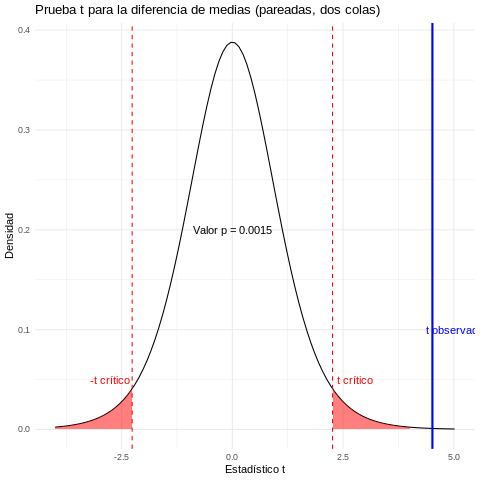

In [5]:
%%R
# Datos
antes <- c(55.2, 56.8, 57.1, 58.0, 54.9, 56.3, 55.5, 57.5, 56.0, 57.8)
despues <- c(54.1, 55.5, 56.9, 57.2, 54.9, 55.8, 55.0, 56.6, 55.9, 57.0)
diferencias <- antes - despues
n <- length(diferencias)
media_d <- mean(diferencias)
sd_d <- sd(diferencias)
alfa <- 0.05
gl <- n - 1

# Calcular el estadístico de prueba t
t_estadistico <- (media_d - 0) / (sd_d / sqrt(n))
cat("Estadístico t:", t_estadistico, "\n")

# Calcular el valor p (prueba de dos colas)
p_valor <- 2 * pt(abs(t_estadistico), df = gl, lower.tail = FALSE)
cat("Valor p:", p_valor, "\n")

# Decisión
if (p_valor <= alfa) {
  cat("Rechazamos la hipótesis nula.\n")
} else {
  cat("No rechazamos la hipótesis nula.\n")
}

# Visualización de la región crítica y el valor p
library(ggplot2)
library(dplyr)

# Crear el gráfico
df <- data.frame(x = seq(-4, 4, 0.01))
t_critico <- qt(1 - alfa/2, df = gl)

ggplot(df, aes(x = x)) +
  stat_function(fun = dt, args = list(df = gl)) +
  # Región crítica (roja)
  geom_area(data = subset(df, x < -t_critico),
            aes(y = dt(x, df = gl)), fill = "red", alpha = 0.5) +
  geom_area(data = subset(df, x > t_critico),
            aes(y = dt(x, df = gl)), fill = "red", alpha = 0.5) +
  # Valor p (amarillo)
  geom_area(data = subset(df, x > abs(t_estadistico)),
            aes(y = dt(x, df = gl)), fill = "yellow", alpha = 0.5) +
  geom_area(data = subset(df, x < -abs(t_estadistico)),
            aes(y = dt(x, df = gl)), fill = "yellow", alpha = 0.5) +
  # Líneas críticas
  geom_vline(xintercept = c(-t_critico, t_critico), linetype = "dashed", color = "red") +
  # Línea del estadístico observado
  geom_vline(xintercept = t_estadistico, color = "blue", linewidth = 1) +
  # Anotaciones
  annotate("text", x = -t_critico - 0.5, y = 0.05, label = "-t crítico", color = "red") +
  annotate("text", x = t_critico + 0.5, y = 0.05, label = "t crítico", color = "red") +
  annotate("text", x = t_estadistico + 0.5, y = 0.1, label = "t observado", color = "blue") +
  annotate("text", x = 0, y = 0.2, label = paste("Valor p =", round(p_valor, 4)), color = "black") +
  labs(title = "Prueba t para la diferencia de medias (pareadas, dos colas)",
       x = "Estadístico t",
       y = "Densidad") +
  theme_minimal()



## **Usando Python**

Estadístico t: 4.5165
Valor p: 0.0015
Rechazamos la hipótesis nula.


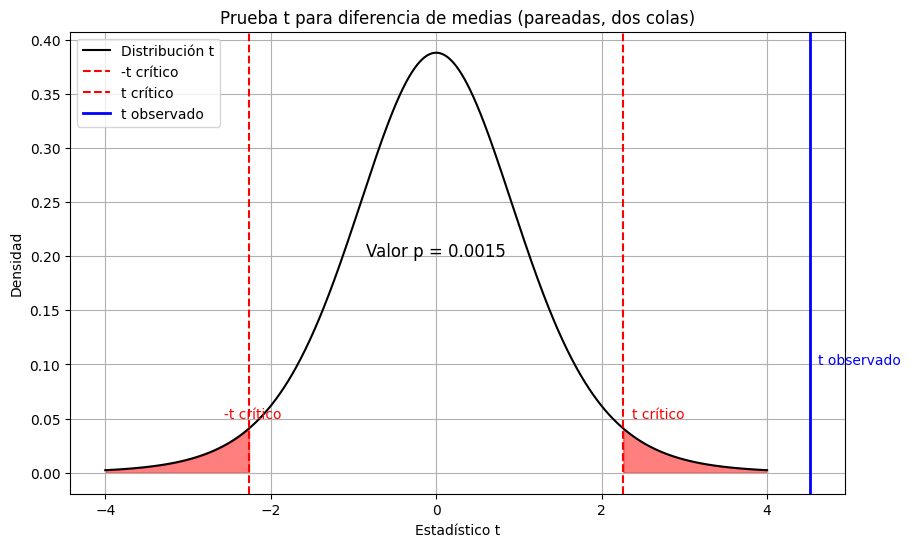

In [6]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Datos
antes = np.array([55.2, 56.8, 57.1, 58.0, 54.9, 56.3, 55.5, 57.5, 56.0, 57.8])
despues = np.array([54.1, 55.5, 56.9, 57.2, 54.9, 55.8, 55.0, 56.6, 55.9, 57.0])
diferencias = antes - despues

# Parámetros
n = len(diferencias)
media_d = np.mean(diferencias)
sd_d = np.std(diferencias, ddof=1)
alfa = 0.05
gl = n - 1

# Estadístico t
t_estadistico = (media_d - 0) / (sd_d / np.sqrt(n))
print(f"Estadístico t: {t_estadistico:.4f}")

# Valor p (dos colas)
p_valor = 2 * stats.t.sf(np.abs(t_estadistico), df=gl)
print(f"Valor p: {p_valor:.4f}")

# Decisión
if p_valor <= alfa:
    print("Rechazamos la hipótesis nula.")
else:
    print("No rechazamos la hipótesis nula.")

# Visualización
x = np.linspace(-4, 4, 1000)
y = stats.t.pdf(x, df=gl)
t_critico = stats.t.ppf(1 - alfa / 2, df=gl)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label="Distribución t", color="black")

# Regiones críticas (rojo)
plt.fill_between(x, 0, y, where=(x < -t_critico), color='red', alpha=0.5)
plt.fill_between(x, 0, y, where=(x > t_critico), color='red', alpha=0.5)

# Región valor p (amarillo)
plt.fill_between(x, 0, y, where=(x < -np.abs(t_estadistico)), color='yellow', alpha=0.5)
plt.fill_between(x, 0, y, where=(x > np.abs(t_estadistico)), color='yellow', alpha=0.5)

# Líneas críticas y t observado
plt.axvline(-t_critico, color='red', linestyle='dashed', label='-t crítico')
plt.axvline(t_critico, color='red', linestyle='dashed', label='t crítico')
plt.axvline(t_estadistico, color='blue', linewidth=2, label='t observado')

# Anotaciones
plt.text(-t_critico - 0.3, 0.05, "-t crítico", color="red")
plt.text(t_critico + 0.1, 0.05, "t crítico", color="red")
plt.text(t_estadistico + 0.1, 0.1, "t observado", color="blue")
plt.text(0, 0.2, f"Valor p = {round(p_valor, 4)}", ha='center', fontsize=12)

# Etiquetas y título
plt.title("Prueba t para diferencia de medias (pareadas, dos colas)")
plt.xlabel("Estadístico t")
plt.ylabel("Densidad")
plt.legend()
plt.grid(True)
plt.show()
